In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
######### INITIALIZING THE DATE #########
m = random.randrange(1,30) / 10
b = random.randrange(1,10) / 10
max = 20
z = []
g = []
x = [np.random.uniform(0,max) for _ in range(200)]
y = [np.random.uniform(0,max) for _ in range(200)]
for _ in range(len(x)):
    z.append(0)
    g.append(0)

In [3]:
class Percep():
    lr = 0.1
    
    def __init__(self, n):
        self.weights =[np.random.uniform(-1,1) for _ in range(n)] #### initializing the weights
    
    def labeling(self, x, y):                                     #### labeling the data
        for i in range(len(x)):
            if((x[i] * m + b) >= y[i]):
                z[i] = -1
            else:
                z[i] = 1
                
    ######### FEED FORWARD #########    
    
    def sign(self, d):                                            #### activation function: returns the sign of the weighted sum
        if (d >= 0):
            return 1
        else:
            return -1
    
    def guess(self, x, y):                                        #### calculating the guess
        f = 0
        sumx = 0
        sumx += x * self.weights[0] + y * self.weights[1]
        return self.sign(sumx)
    
    def tweak(self,x, y, label):                                  #### tweakign the weights
        gues = self.guess(x, y)
        error = label - gues
        for i in range(len(self.weights)):
            self.weights[i] += error * x * self.lr
        return(self.guess(x, y))
    
    ######### BACK PROPAGATIONG : GRADIENT DESCENT #########
    
    def train(self, x,y):                                        #### gradient descent on every point
        self.labeling(x, y)
        for i in range(len(x)):
            while(z[i] - g[i]):
                g[i] = self.tweak(x[i], y[i], z[i])

In [4]:
######### CALLING THE PERCEPTRON / TRAINING #########
p = Percep(2)
p.train(x, y)

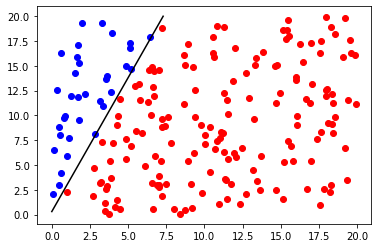

In [5]:
######### PLOTING THE DATA #########
for i in range(len(x)):
    if (g[i] == -1):
        plt.scatter(x[i], y[i], color = 'red')
    else:
        plt.scatter(x[i], y[i], color = 'blue')
xl = np.linspace(0, (max - b)/m, 2)
plt.plot(xl, xl*m + b, color = 'black')
plt.show()